In [1]:
import pandas as pd
import numpy as np

In [2]:
movies=pd.read_csv("./ml-latest-small/movies.csv")
        
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movie= {}

for i in movies.index:
    movie_id=movies.loc[i]["movieId"]
    title=movies.loc[i]["title"]
    #print(title)
    if movie_id not in movie.keys():
        movie[movie_id]=title
#print(movie[318])


In [4]:
ratings=pd.read_csv("./ml-latest-small/ratings.csv")
        
ratings.head()

,userId,movieId,rating,timestamp
0,1,804,4.0,964980499
1,1,1210,5.0,964980499
2,1,2018,5.0,964980523
3,1,2628,4.0,964980523
4,1,2826,4.0,964980523


In [5]:
print(len(movies))
print(len(ratings))

9742
100836


In [6]:
r_dict=[[0 for col in range(0)] for row in range(610)]

for i in ratings.index:
    userid=int(ratings.loc[i][0])
    r_dict[userid-1].append(movie[ratings.loc[i][1]])

In [7]:
print (r_dict[1])

['Shawshank Redemption, The (1994)', 'Inception (2010)', 'The Jinx: The Life and Deaths of Robert Durst (2015)', 'Ex Machina (2015)', 'Django Unchained (2012)', 'Whiplash (2014)', 'Gladiator (2000)', 'Dark Knight Rises, The (2012)', 'Shutter Island (2010)', 'Girl with the Dragon Tattoo, The (2011)', 'Exit Through the Gift Shop (2010)', 'Kill Bill: Vol. 1 (2003)', 'Collateral (2004)', 'Wolf of Wall Street, The (2013)', 'Zombieland (2009)', 'Step Brothers (2008)', 'Talladega Nights: The Ballad of Ricky Bobby (2006)', 'Tommy Boy (1995)', 'Departed, The (2006)', 'Dark Knight, The (2008)', 'Interstellar (2014)', 'Inglourious Basterds (2009)', 'Louis C.K.: Hilarious (2010)', 'Inside Job (2010)', 'Warrior (2011)', 'Good Will Hunting (1997)', 'Mad Max: Fury Road (2015)', 'The Drop (2014)', 'Town, The (2010)']


In [8]:
print(len(r_dict))

610


In [9]:
from gensim.models import Word2Vec

In [10]:
#model=Word2Vec(sentences=r_dict,size=75,window=5,min_count=1,workers=4,sg=0)
model=Word2Vec(r_dict[:],size=100,min_count=5)

In [11]:
model_result1 = model.wv.most_similar("Toy Story (1995)")
result1=pd.DataFrame(model_result1, columns=["title","consine similarity"])

result1[:]

,title,consine similarity
0,Independence Day (a.k.a. ID4) (1996),0.999674
1,Speed (1994),0.999365
2,Terminator 2: Judgment Day (1991),0.999335
3,Seven (a.k.a. Se7en) (1995),0.999316
4,GoldenEye (1995),0.998230
5,"Lion King, The (1994)",0.998146
6,While You Were Sleeping (1995),0.998008
7,Mission: Impossible (1996),0.997682
8,Waterworld (1995),0.997577
9,Forrest Gump (1994),0.997520


In [12]:
model_result2 = model.wv.most_similar("Interstellar (2014)")
result2=pd.DataFrame(model_result2, columns=["title","consine similarity"])

result2[:]

,title,consine similarity
0,"Prestige, The (2006)",0.999910
1,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",0.999883
2,WALL·E (2008),0.999881
3,Up (2009),0.999864
4,"Bourne Ultimatum, The (2007)",0.999856
5,12 Angry Men (1957),0.999856
6,Iron Man (2008),0.999856
7,Full Metal Jacket (1987),0.999850
8,V for Vendetta (2006),0.999849
9,Casablanca (1942),0.999847


In [13]:
model_result3 = model.wv.most_similar("Modern Times (1936)")
result3=pd.DataFrame(model_result3, columns=["title","consine similarity"])

result3[:]

,title,consine similarity
0,Lawrence of Arabia (1962),0.999788
1,Chinatown (1974),0.999782
2,To Kill a Mockingbird (1962),0.999775
3,"Good, the Bad and the Ugly, The (Buono, il bru...",0.999769
4,Groundhog Day (1993),0.999768
5,"Wizard of Oz, The (1939)",0.999768
6,Amadeus (1984),0.999767
7,Run Lola Run (Lola rennt) (1998),0.999765
8,Ghostbusters (a.k.a. Ghost Busters) (1984),0.999759
9,"Untouchables, The (1987)",0.999755


In [14]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

#path_gothic = "/home/ururu/fonts/NanumGothic.ttf"
#prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [15]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [16]:
df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

In [17]:
df.head()

,x,y
She's the One (1996),-23.569971,-14.297295
Star Wars: Episode VI - Return of the Jedi (1983),-47.420959,53.776505
Bambi (1942),23.728846,53.671211
Star Wars: Episode I - The Phantom Menace (1999),-44.923103,57.792126
"13th Warrior, The (1999)",-36.015923,25.880436


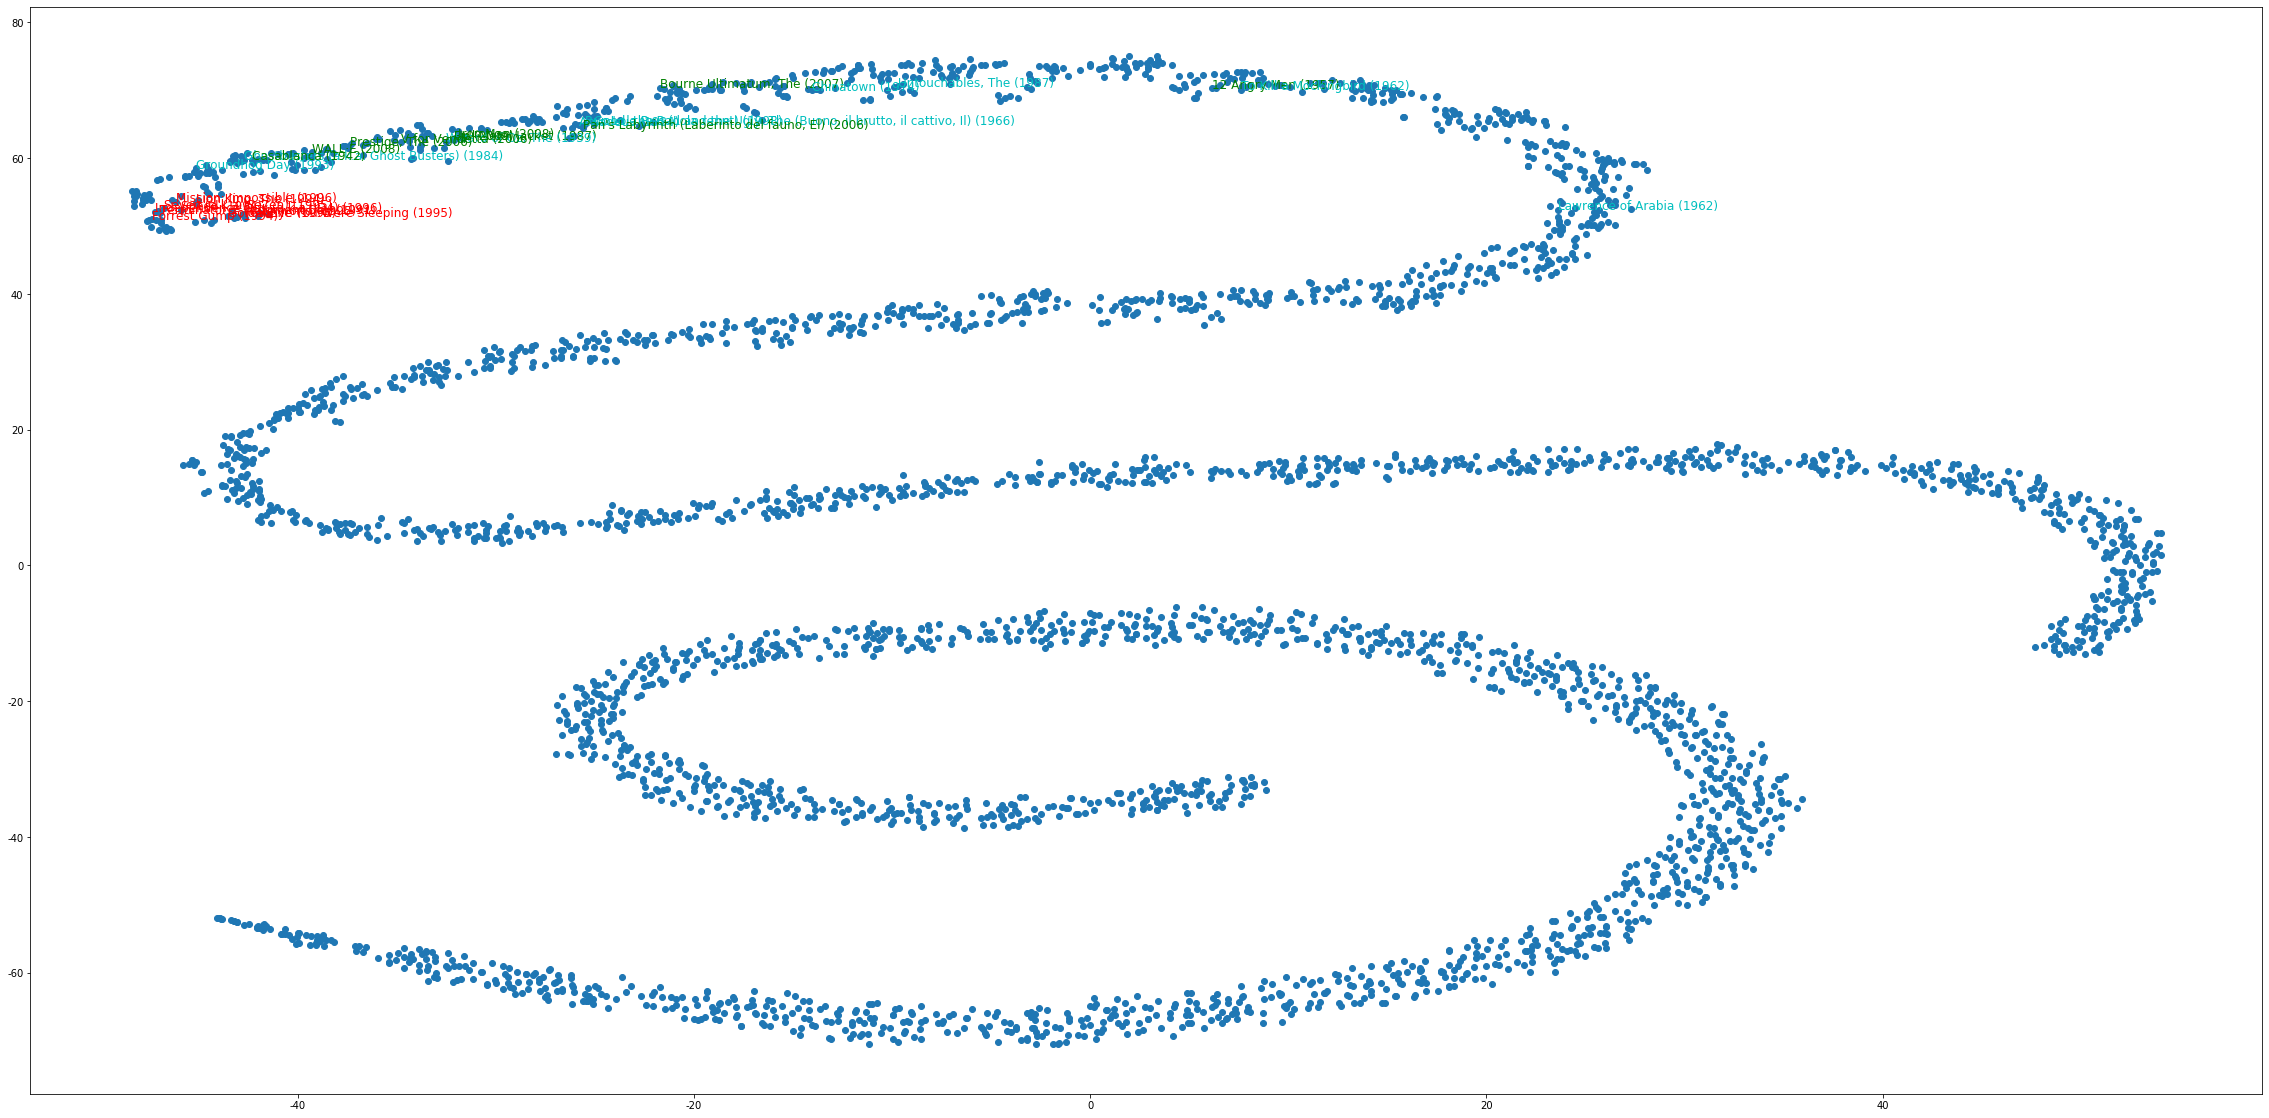

In [18]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"],df["y"])

for word, pos in list(df.iterrows()):
    for a, b in model_result1:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="r")
    
    for a, b in model_result2:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="g")
    
    for a, b in model_result3:
        if a==word :
            ax.annotate(word, pos, fontsize=12, color="c")
    
plt.show()